In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LETS READ THE DATA AND CREATE A DF
df=pd.read_csv("Churn_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
#lets build the model // import model specific functions // decision tree model first
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [4]:
# SETTING X AND Y

In [5]:
x=df.drop(['CustomerId','Exited',"Surname","RowNumber"],axis=1)

In [6]:
y=df["Exited"]

In [7]:
x=pd.get_dummies(x,dtype='int')
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [8]:
#train test split 
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
#lets build model
#model definition
mod1=DecisionTreeClassifier(max_depth=2)
#run the model
mod1.fit(xtrain,ytrain)
#run predictions 
pred1=mod1.predict(xtest)
#evaluate model performance by classification report
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.67      0.41      0.51       393

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



[Text(0.5, 0.8333333333333334, 'Age <= 44.5\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]'),
 Text(0.25, 0.5, 'NumOfProducts <= 2.5\ngini = 0.228\nsamples = 6130\nvalue = [5324.0, 806.0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.204\nsamples = 5987\nvalue = [5296, 691]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.315\nsamples = 143\nvalue = [28, 115]'),
 Text(0.75, 0.5, 'IsActiveMember <= 0.5\ngini = 0.495\nsamples = 1870\nvalue = [1032, 838]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.44\nsamples = 804\nvalue = [263, 541]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.402\nsamples = 1066\nvalue = [769, 297]')]

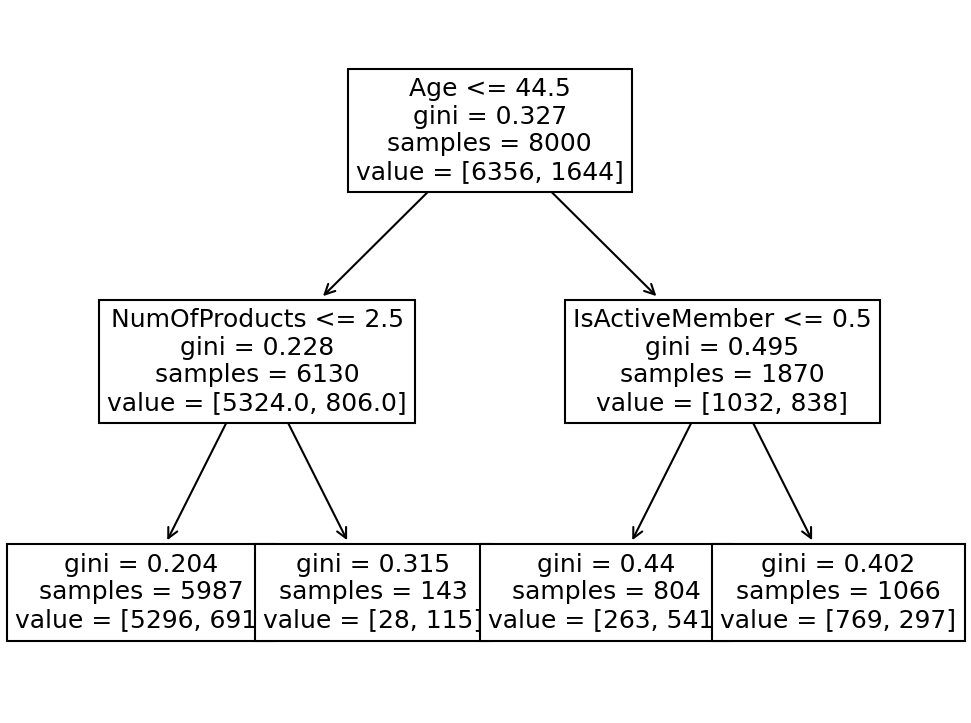

In [10]:
# PLOTTING THE DECISION TREE
x_cols=x.columns
plt.figure(figsize=(8,6),dpi=150)
plot_tree(mod1,fontsize=12,feature_names=x_cols)


In [11]:
#balancing the dataset 
# split data set into two categories
df_maj=df[df["Exited"]==0]
df_min=df[df["Exited"]==1]

In [12]:
print(df_maj.shape,df_min.shape)

(7963, 14) (2037, 14)


In [13]:
# DOWN SAMPLING
df_maj_d=df_maj.sample(n=2037,replace=False,random_state=41)
df_maj_d

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4534,4535,15629475,Clark,656,France,Male,41,2,0.00,2,1,0,158973.77,0
6254,6255,15721047,Ansell,578,Germany,Male,37,1,135650.88,1,1,0,199428.19,0
8827,8828,15580149,Fowler,638,Spain,Male,41,7,0.00,2,1,0,43889.41,0
8150,8151,15738936,Stevenson,760,Germany,Male,29,5,103607.24,2,0,1,86334.64,0
9449,9450,15615444,Y?an,663,Germany,Male,28,8,123674.28,2,1,1,87985.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,4110,15807768,Cohn,702,Germany,Male,28,1,103033.83,1,1,1,40321.87,0
8268,8269,15712608,Costa,787,Germany,Female,42,2,74483.97,2,0,1,44273.91,0
4158,4159,15771580,Davison,850,France,Female,38,0,106831.69,1,0,1,148977.72,0
7430,7431,15754578,Okeke,606,France,Female,35,0,135984.15,2,1,0,186778.89,0


In [14]:
# JOINING BOTH THE DATAFRAMES
df_ds=pd.concat([df_maj_d,df_min])
df_ds

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4534,4535,15629475,Clark,656,France,Male,41,2,0.00,2,1,0,158973.77,0
6254,6255,15721047,Ansell,578,Germany,Male,37,1,135650.88,1,1,0,199428.19,0
8827,8828,15580149,Fowler,638,Spain,Male,41,7,0.00,2,1,0,43889.41,0
8150,8151,15738936,Stevenson,760,Germany,Male,29,5,103607.24,2,0,1,86334.64,0
9449,9450,15615444,Y?an,663,Germany,Male,28,8,123674.28,2,1,1,87985.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [15]:
df_ds=df_ds.reset_index(drop=True)

In [16]:
#Shuffling the dataset and resetting index
df_sf=df_ds.sample(frac=1,random_state=41)
df_sf.reset_index(drop=True,inplace=True)
df_sf

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,4459,15585839,Niu,633,France,Male,37,2,0.00,2,1,0,182258.17,0
1,3531,15623712,Coates,453,Spain,Female,42,5,0.00,3,1,0,83008.49,1
2,8019,15616676,Donnelly,632,Germany,Male,23,3,122478.51,1,1,0,147230.77,1
3,6602,15655213,Udinese,591,Germany,Female,51,8,132508.30,1,1,1,161304.68,1
4,4297,15702788,Gadsdon,775,France,Male,40,9,126212.64,1,1,0,70196.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,3713,15613216,Cameron,639,Spain,Female,39,1,141789.15,1,1,0,92455.96,0
4070,9961,15681026,Lucciano,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
4071,9474,15690733,Angelo,608,Spain,Male,45,4,0.00,2,0,0,36697.48,1
4072,4377,15659820,Cross,614,France,Female,34,5,0.00,2,1,0,185561.89,0


In [17]:
#resetting x and y with downsampling data 
y=df_sf["Exited"]
x=df_sf.drop(["CustomerId","Exited","RowNumber","Surname"],axis=1)
x=pd.get_dummies(x,dtype='int')

In [18]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,633,37,2,0.00,2,1,0,182258.17,1,0,0,0,1
1,453,42,5,0.00,3,1,0,83008.49,0,0,1,1,0
2,632,23,3,122478.51,1,1,0,147230.77,0,1,0,0,1
3,591,51,8,132508.30,1,1,1,161304.68,0,1,0,1,0
4,775,40,9,126212.64,1,1,0,70196.57,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,639,39,1,141789.15,1,1,0,92455.96,0,0,1,1,0
4070,795,33,9,104552.72,1,1,1,120853.83,0,1,0,1,0
4071,608,45,4,0.00,2,0,0,36697.48,0,0,1,0,1
4072,614,34,5,0.00,2,1,0,185561.89,1,0,0,1,0


In [19]:
# train test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=41,stratify=y)

In [20]:
# rebuilding the model with down sampling data 
mod2=DecisionTreeClassifier(max_depth=5)
mod2.fit(xtrain,ytrain)
predt_dtc=mod2.predict(xtest)
print(classification_report(ytest,predt_dtc))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       408
           1       0.76      0.72      0.74       407

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



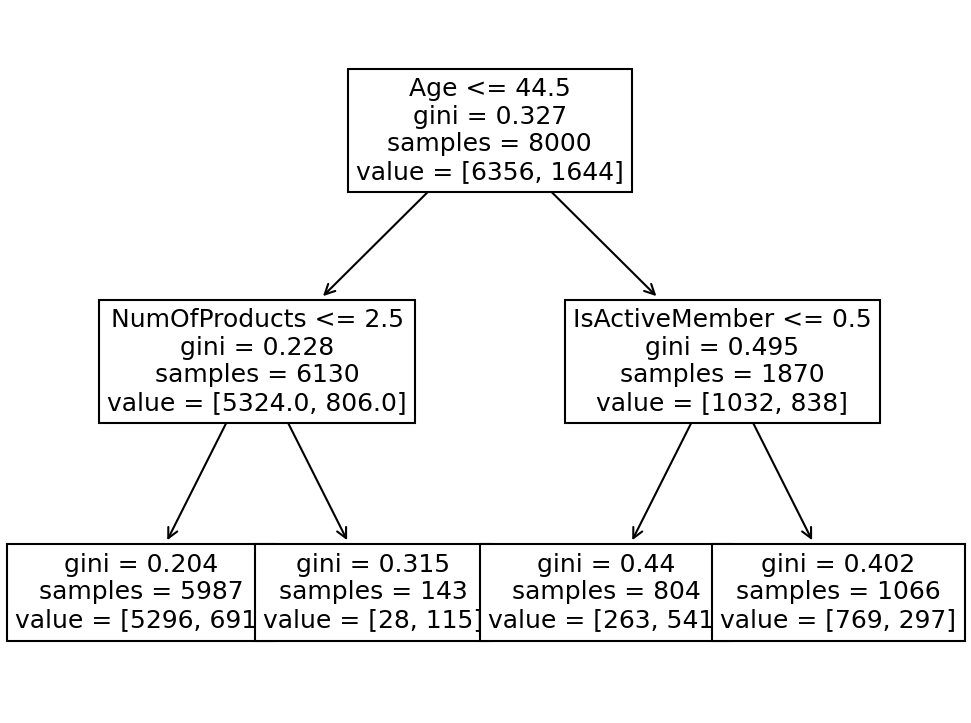

In [21]:
# plotting the decision tree
x_cols=x.columns
plt.figure(figsize=(8,6),dpi=150)
plot_tree(mod1,fontsize=12,feature_names=x_cols);


In [22]:
# IMPORTING LIBRARIES FOR RANDOM FOREST AND KNEIGHBORS CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [23]:
# KNN MODEL
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
y_pred_knn = knn.predict(xtest)
print(classification_report(ytest, y_pred_knn))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53       408
           1       0.52      0.53      0.53       407

    accuracy                           0.53       815
   macro avg       0.53      0.53      0.53       815
weighted avg       0.53      0.53      0.53       815



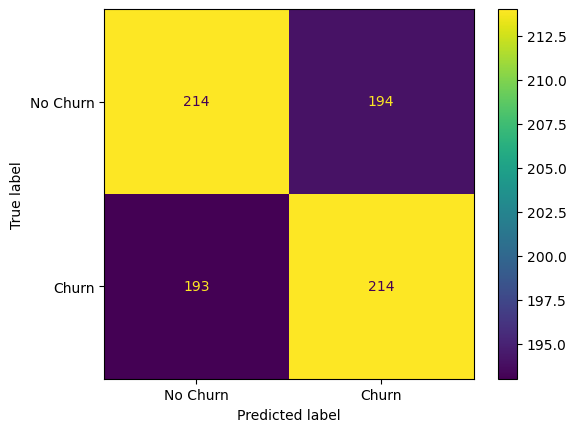

In [24]:
cm_knn = confusion_matrix(ytest, y_pred_knn)
ConfusionMatrixDisplay(cm_knn ,display_labels=['No Churn','Churn']).plot()

In [25]:
# BUILDING RANDOM FOREST MODEL
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)
y_pred_rf = rf.predict(xtest)
print(classification_report(ytest, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       408
           1       0.79      0.73      0.76       407

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



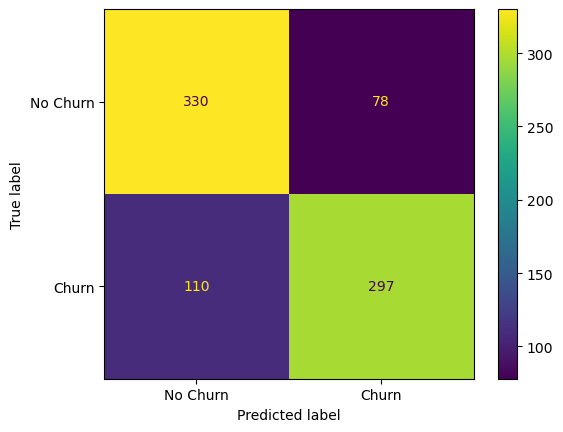

In [26]:
cm_rf = confusion_matrix(ytest, y_pred_rf)
ConfusionMatrixDisplay(cm_rf,display_labels=['No Churn','Churn']).plot()

In [27]:
!pip install scikit-optimize

In [35]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Use Classifier instead of Regressor
mod3 = RandomForestClassifier(random_state=42)

# Parameter space
param_space = {
    'n_estimators': (20, 200),       
    'max_depth': (3, 20),               
    'max_features': ['sqrt', 'log2'], 
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Bayesian Optimization
opt = BayesSearchCV(
    estimator=mod3,
    search_spaces=param_space,
    scoring='f1',   # classification metric
    n_iter=10,
    random_state=42
)

opt.fit(xtrain, ytrain)

print("Best Params:", opt.best_params_)
print("Best F1:", opt.best_score_)

Best Params: OrderedDict({'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 19, 'n_estimators': 176})
Best F1: 0.7764240077613338


In [36]:
# Final model with best parameters
best_mod = opt.best_estimator_


In [37]:
# Evaluate on test set
ypred = best_mod.predict(xtest)
print("\nClassification Report (Test Data):")
print(classification_report(ytest, ypred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       408
           1       0.80      0.74      0.77       407

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815



In [29]:
# Feature Importance (RF only)
# Extract feature importances from RandomForest
feat_imp = rf.feature_importances_

# Convert to DataFrame for readability
feat_impdf = pd.DataFrame(data=feat_imp, index=x.columns, columns=["Importance"])

In [30]:
print(feat_impdf.head(10))

                   Importance
CreditScore          0.128447
Age                  0.240765
Tenure               0.082558
Balance              0.143729
NumOfProducts        0.136015
HasCrCard            0.020733
IsActiveMember       0.038134
EstimatedSalary      0.135620
Geography_France     0.013453
Geography_Germany    0.027111


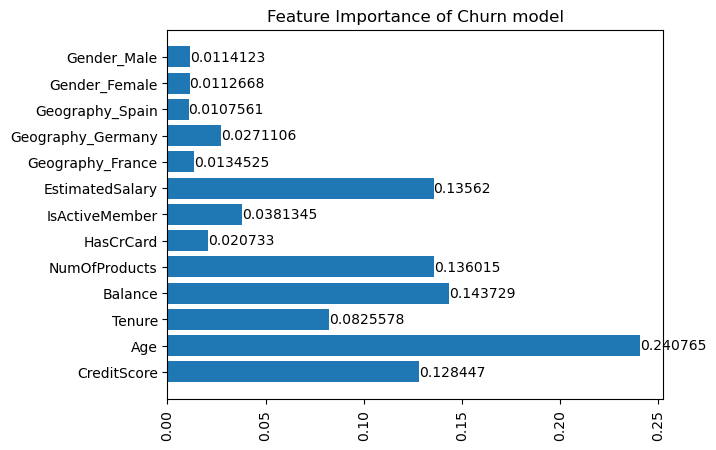

In [31]:
# extract features that influence churn customers leave the company
bars=plt.barh(y=x.columns,width=feat_imp)
plt.bar_label(bars)
plt.xticks(rotation=90)
plt.title('Feature Importance of Churn model')
plt.show()